In [210]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set()

# Description of the dataset

In [211]:
# Load the data
data = pd.read_csv('Wine_Dataset.csv')
print(data.shape)
data.head()

(1500, 9)


,sample #,acidity,citric acid,sugar,chlorides,density,pH level,sulphates,alcohol
0,1,8.9,0.34,1.4,0.050,0.99554,3.12,0.48,9.1
1,2,7.9,0.21,2.1,0.080,0.99620,3.25,0.51,9.9
2,3,10.2,0.40,2.5,0.068,0.99754,3.38,0.86,10.5
3,4,8.3,0.25,2.2,0.118,0.99616,3.15,0.53,9.8
4,5,7.2,0.46,2.1,0.074,0.99534,3.40,0.85,11.0


In [212]:
data.dtypes

sample #         int64
acidity        float64
citric acid    float64
sugar          float64
chlorides      float64
density        float64
pH level       float64
sulphates      float64
alcohol        float64
dtype: object

In [213]:
data.describe()

,sample #,acidity,citric acid,sugar,chlorides,density,pH level,sulphates,alcohol
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,8.314200,0.271653,2.546333,0.087411,0.996743,3.310953,0.658913,10.431056
std,433.157015,1.735538,0.194972,1.407297,0.046798,0.001897,0.155436,0.171429,1.074574
min,1.000000,4.600000,0.000000,0.900000,0.012000,0.990070,2.740000,0.330000,8.400000
25%,375.750000,7.100000,0.090000,1.900000,0.070000,0.995600,3.210000,0.550000,9.500000
50%,750.500000,7.900000,0.260000,2.200000,0.079000,0.996755,3.310000,0.620000,10.200000
75%,1125.250000,9.200000,0.430000,2.600000,0.090000,0.997842,3.400000,0.730000,11.100000
max,1500.000000,15.900000,1.000000,15.500000,0.611000,1.003690,4.010000,2.000000,14.900000


# Data Cleaning

In [214]:
# Check for missing data
data.isnull().any().any()

False

In [215]:
# Check for unreasonable values
data.map(np.isreal)

,sample #,acidity,citric acid,sugar,chlorides,density,pH level,sulphates,alcohol
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1495,True,True,True,True,True,True,True,True,True
1496,True,True,True,True,True,True,True,True,True
1497,True,True,True,True,True,True,True,True,True
1498,True,True,True,True,True,True,True,True,True


# Data Visualization

In [216]:
data_without_index = data.drop("sample #", axis=1)

C:\Users\57655\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\57655\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\57655\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\57655\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

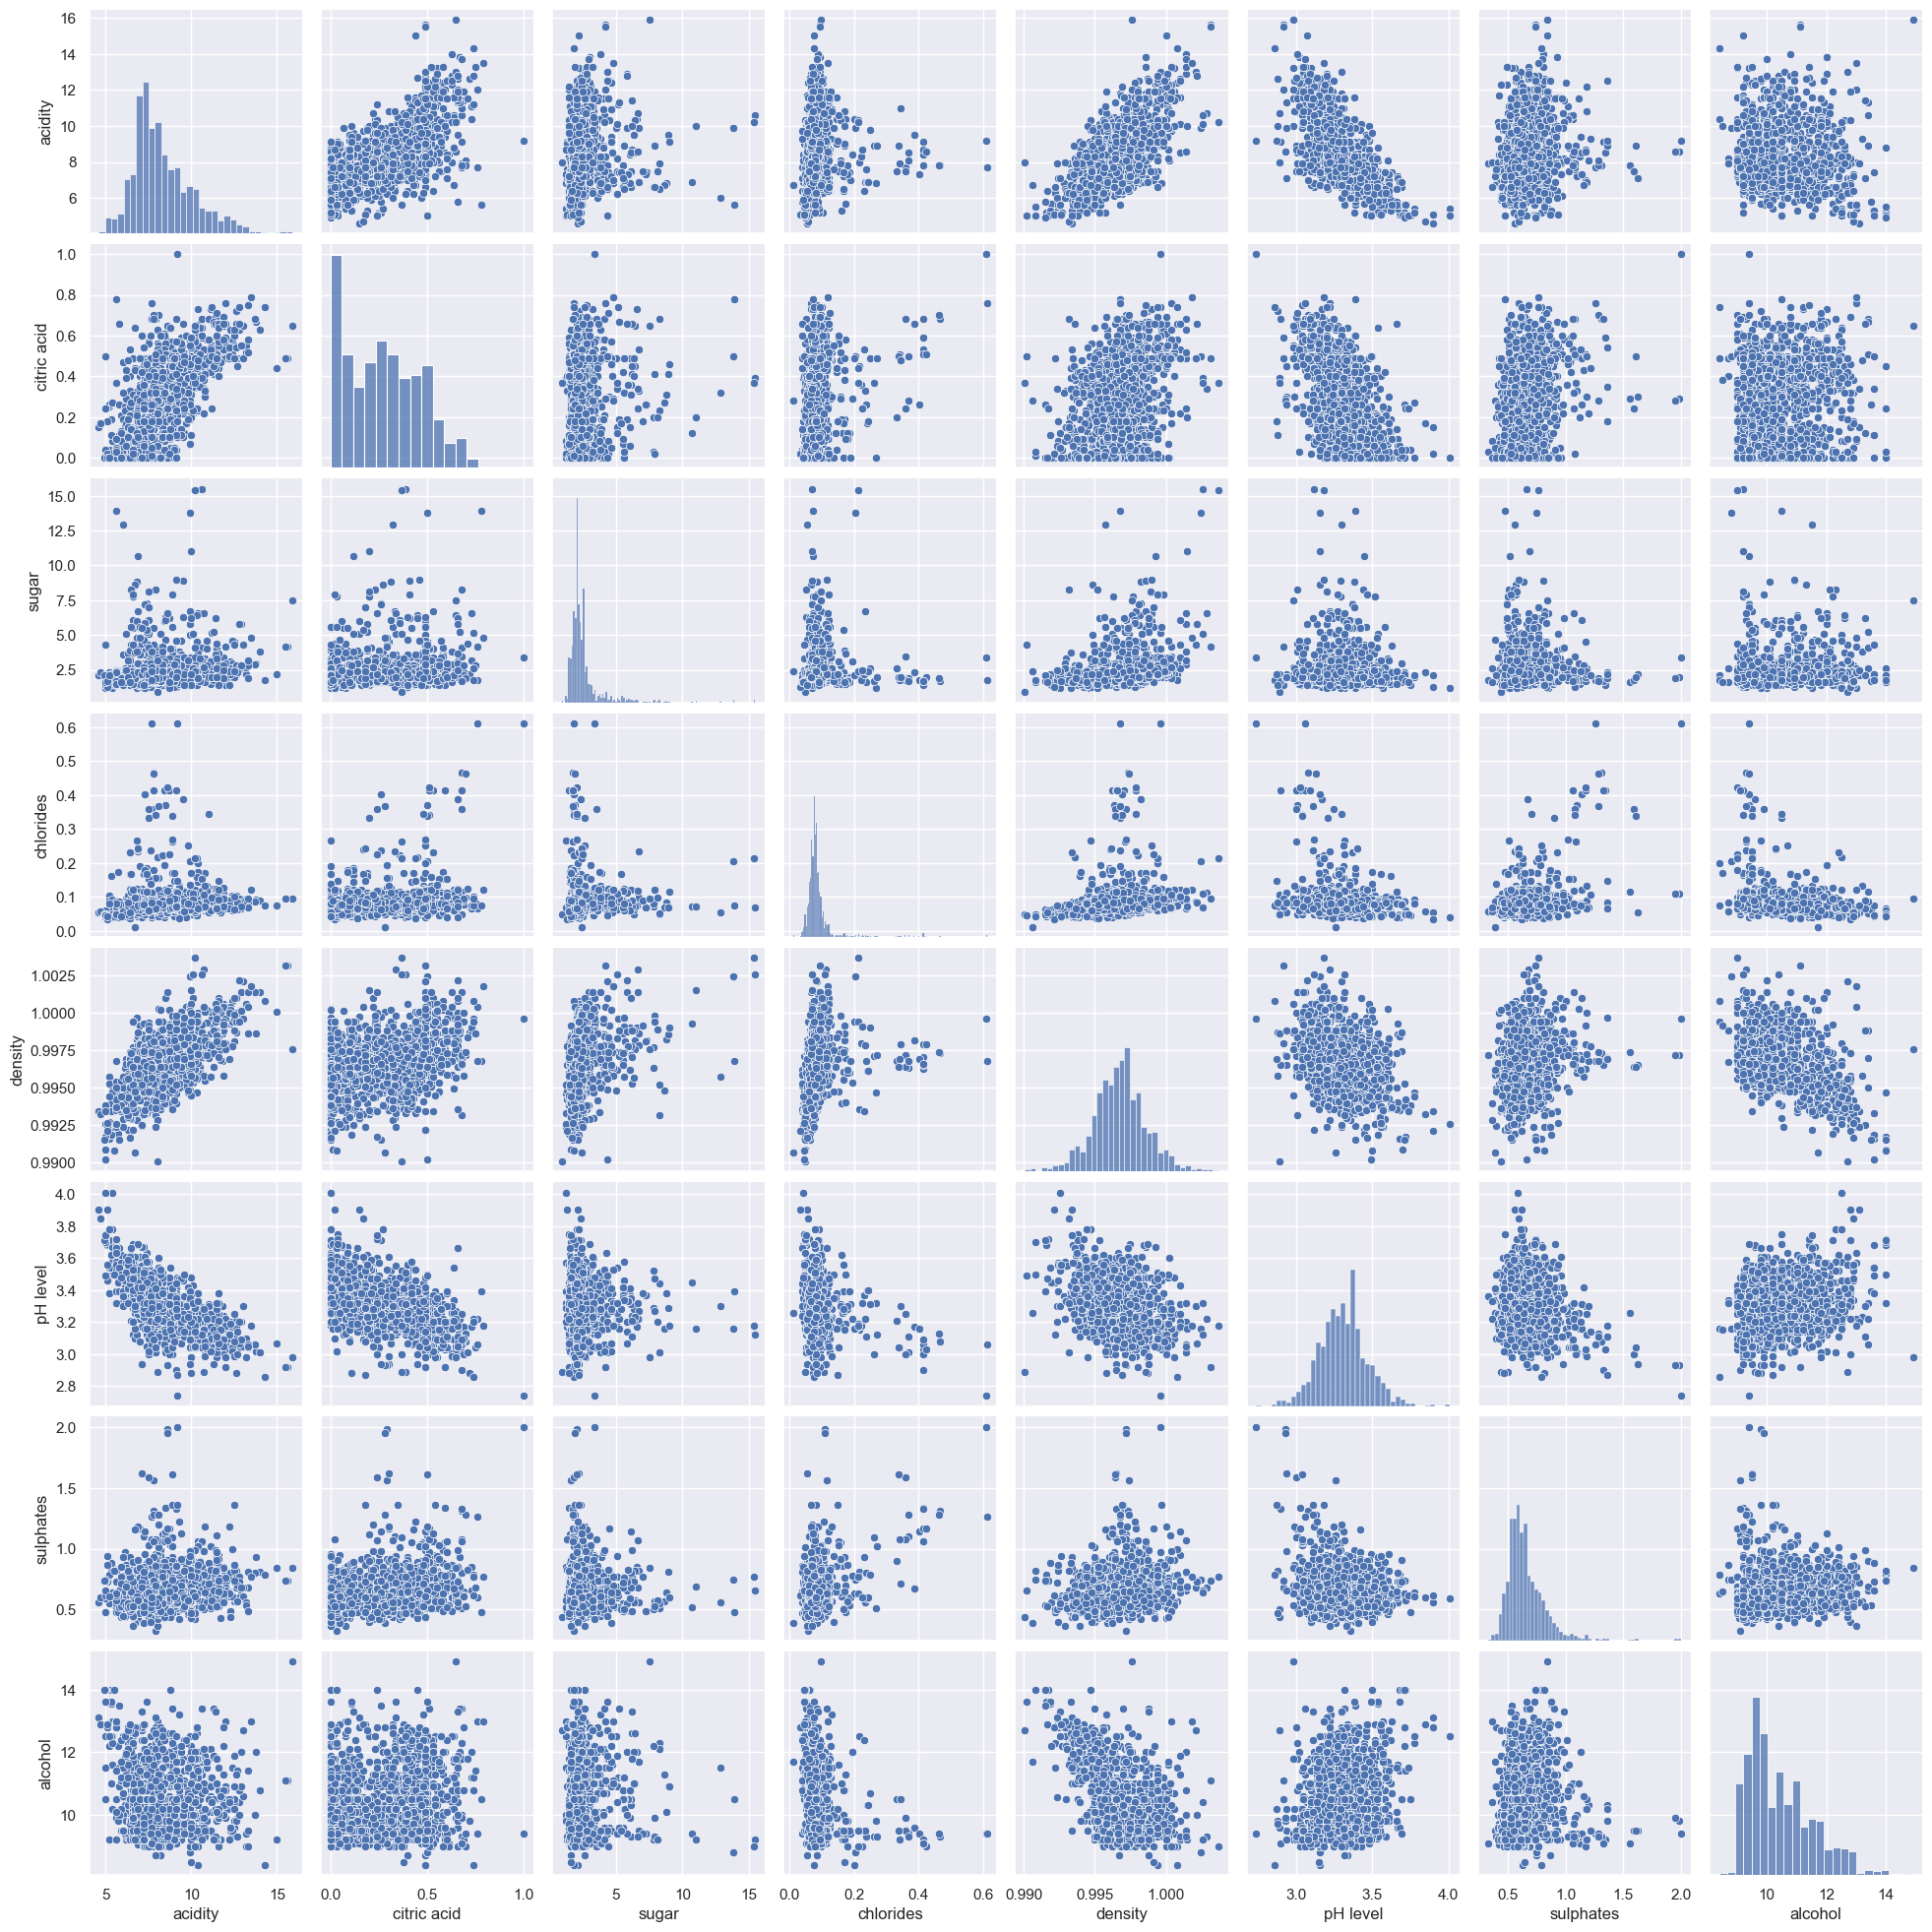

In [217]:
sns.pairplot(data_without_index)

<Axes: >

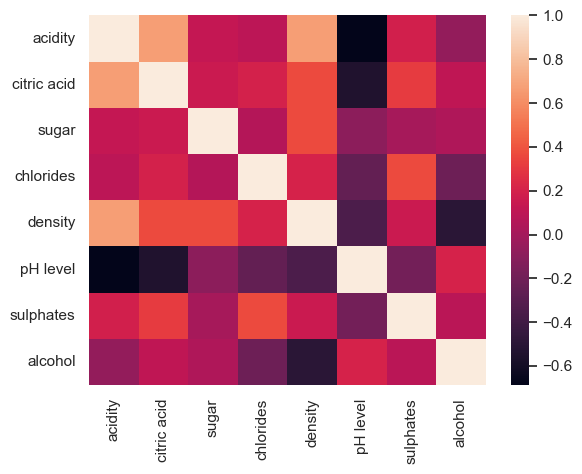

In [218]:
sns.heatmap(data_without_index.corr())

# Preprocessing

In [219]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_without_index)

data_scaled = pd.DataFrame(data_scaled, columns=data_without_index.columns)
data_scaled.head()

,acidity,citric acid,sugar,chlorides,density,pH level,sulphates,alcohol
0,0.337645,0.350664,-0.814836,-0.799667,-0.634217,-1.228908,-1.044008,-1.239096
1,-0.238738,-0.316322,-0.317262,-0.158406,-0.286262,-0.392274,-0.868950,-0.494366
2,1.086942,0.658503,-0.032935,-0.414910,0.420193,0.444360,1.173396,0.064181
3,-0.008185,-0.111096,-0.246180,0.653858,-0.307350,-1.035839,-0.752245,-0.587457
4,-0.642205,0.966343,-0.317262,-0.286658,-0.739658,0.573073,1.115043,0.529637


# Feature Engineering

- Feature extraction: Principal component analysis
- Feature selection: Pearson's correlation

## Feature extraction: Principal component analysis

PC1 = 0.500*acidity + 0.436*citric acid + 0.171*sugar + 0.236*chlorides + 0.441*density + -0.448*pH level + 0.230*sulphates + -0.163*alcohol
PC2 = 0.088*acidity + 0.363*citric acid + -0.115*sugar + -0.027*chlorides + -0.400*density + -0.069*pH level + 0.386*sulphates + 0.730*alcohol
PC3 = -0.283*acidity + -0.137*citric acid + -0.313*sugar + 0.680*chlorides + -0.108*density + 0.039*pH level + 0.515*sulphates + -0.249*alcohol
PC4 = -0.213*acidity + -0.069*citric acid + 0.838*sugar + 0.202*chlorides + 0.155*density + 0.310*pH level + 0.214*sulphates + 0.201*alcohol
PC5 = -0.114*acidity + 0.068*citric acid + 0.216*sugar + 0.500*chlorides + -0.391*density + -0.430*pH level + -0.583*sulphates + 0.086*alcohol
PC6 = -0.143*acidity + -0.364*citric acid + 0.254*sugar + -0.376*chlorides + -0.274*density + -0.625*pH level + 0.376*sulphates + -0.184*alcohol
PC7 = -0.433*acidity + 0.717*citric acid + 0.099*sugar + -0.215*chlorides + -0.222*density + 0.096*pH level + 0.036*sulphates + -0.428*alcohol


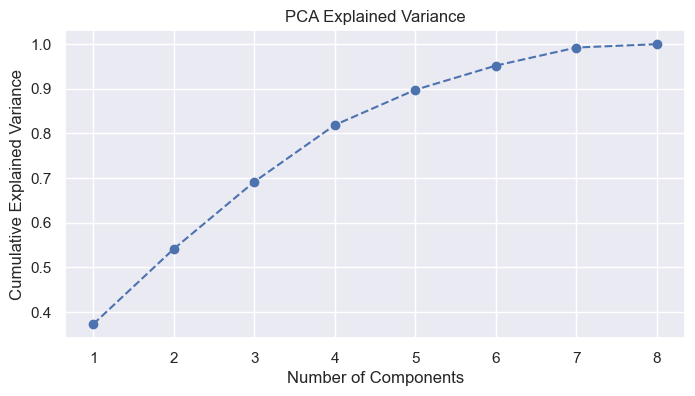

In [220]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_scaled)

# Get the feature names
features = data_without_index.columns

# For each principal component
for i, component in enumerate(pca.components_):
    formula = " + ".join(f"{coef:.3f}*{feat}" for coef, feat in zip(component, features))
    print(f"PC{i+1} = {formula}")

explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('PCA Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [221]:
n_components = 4
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

## Feature selection: Pearson's correlation

In [222]:
correlation_matrix = data_scaled.corr()
correlation_matrix

,acidity,citric acid,sugar,chlorides,density,pH level,sulphates,alcohol
acidity,1.000000,0.669984,0.127390,0.092585,0.667967,-0.687218,0.182937,-0.063015
citric acid,0.669984,1.000000,0.150133,0.198798,0.362843,-0.543408,0.311890,0.106158
sugar,0.127390,0.150133,1.000000,0.060518,0.362564,-0.087936,0.009796,0.042498
chlorides,0.092585,0.198798,0.060518,1.000000,0.204164,-0.257611,0.365794,-0.218798
density,0.667967,0.362843,0.362564,0.204164,1.000000,-0.345985,0.155573,-0.501334
pH level,-0.687218,-0.543408,-0.087936,-0.257611,-0.345985,1.000000,-0.192832,0.208337
sulphates,0.182937,0.311890,0.009796,0.365794,0.155573,-0.192832,1.000000,0.089094
alcohol,-0.063015,0.106158,0.042498,-0.218798,-0.501334,0.208337,0.089094,1.000000


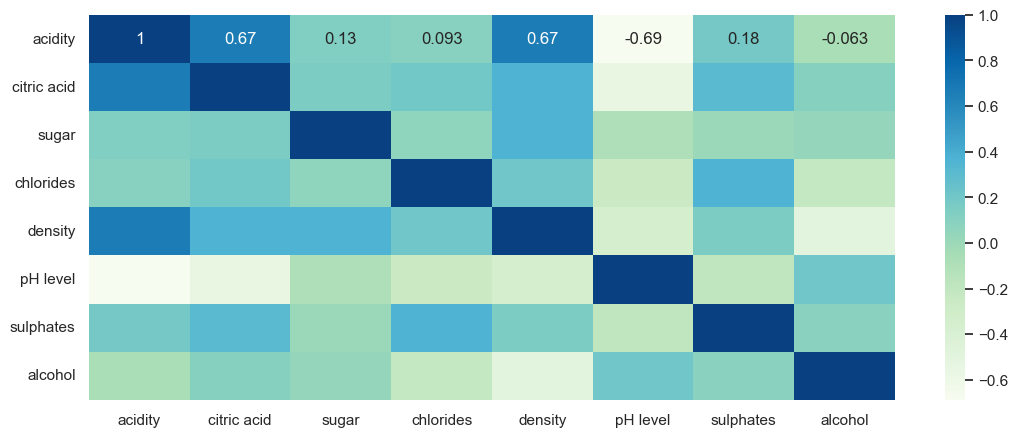

In [223]:
# Visualize the correlation matrix
plt.figure(figsize=(13,5))
sns_plot=sns.heatmap(data=correlation_matrix, annot=True, cmap='GnBu')
plt.show()

# K-means Clustering

In [224]:
# Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


(1500, 4)


C:\Users\57655\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\57655\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\57655\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\57655\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

[6994.581064971899, 5801.700839140399, 4696.115746081735]
[0.31687183891682, 0.27819442446980697, 0.29992947544952]


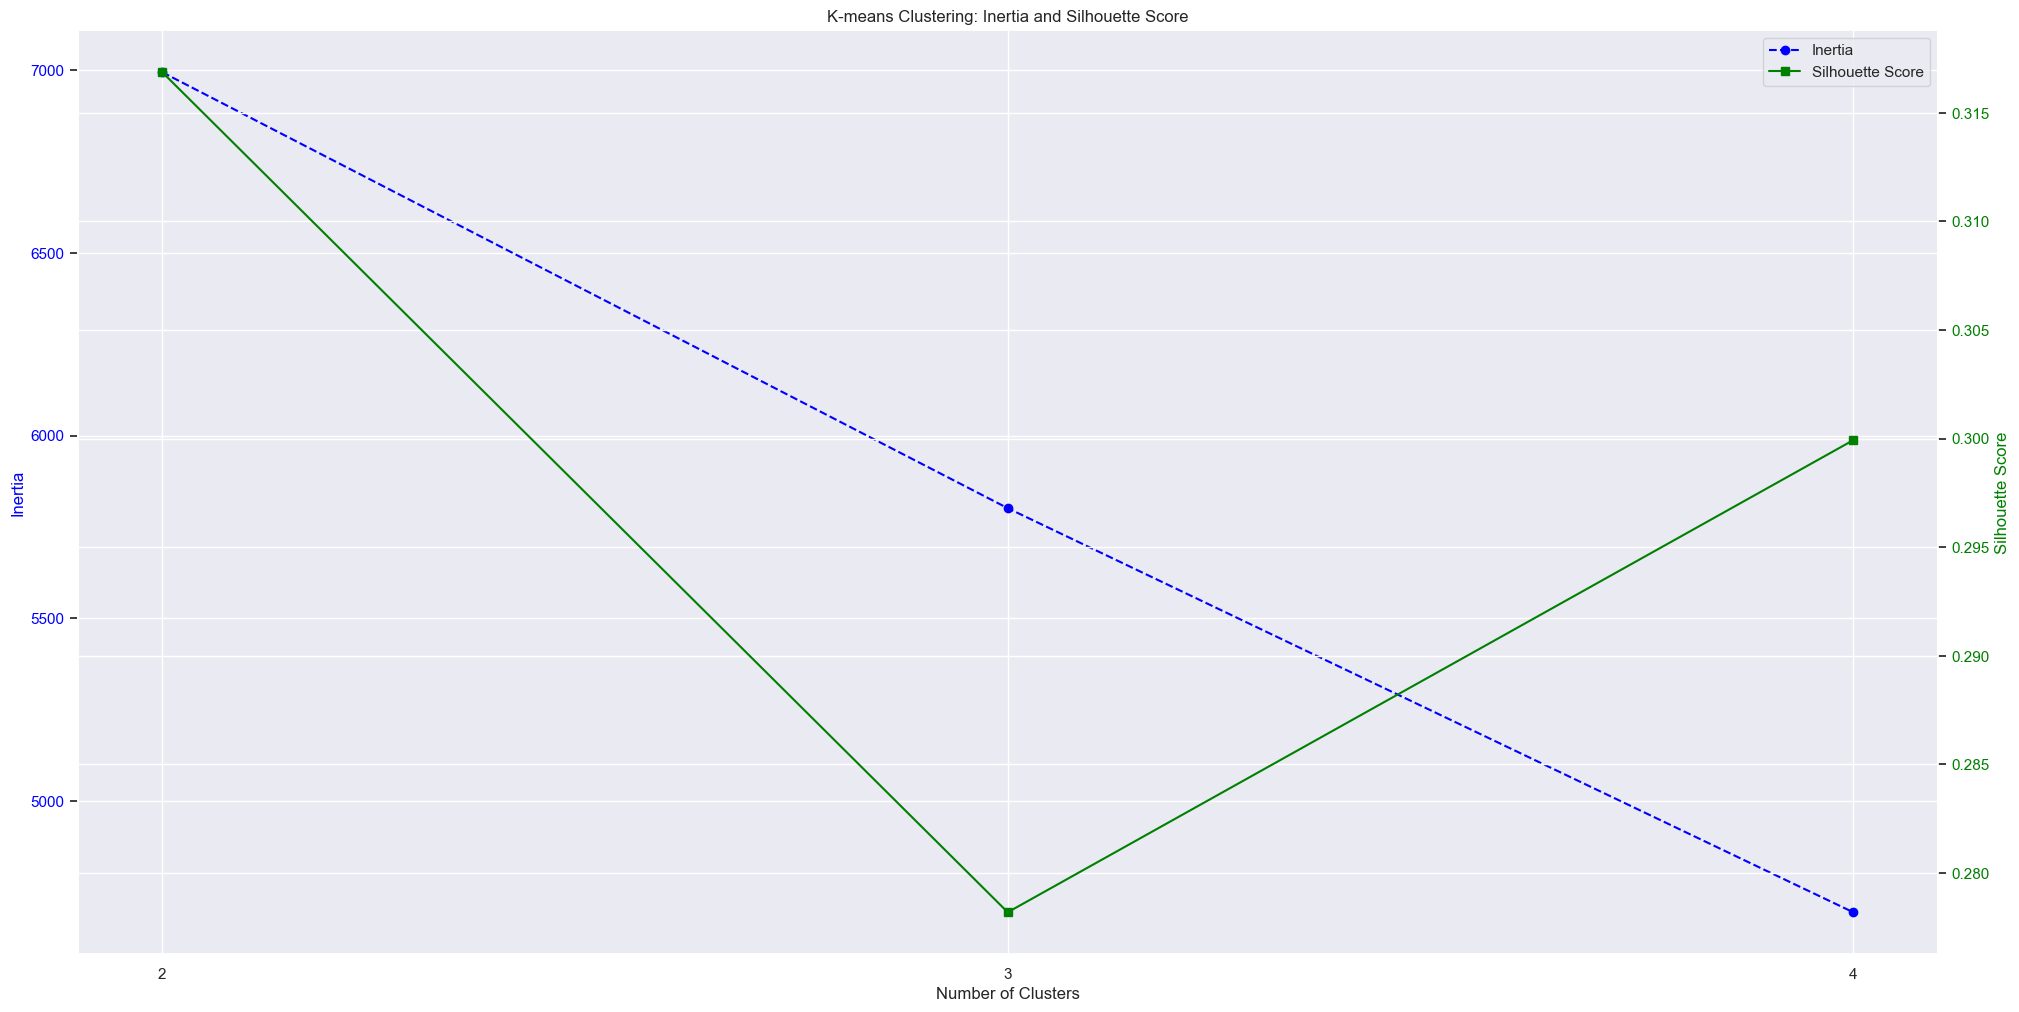

In [225]:
# Find the optimal number of clusters using elbow method
inertia = []
silhouette = []
print(data_pca.shape)
for i in range(2, data_pca.shape[1] + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_pca, kmeans.labels_))
    
print(inertia)
print(silhouette)
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(24, 12))

# Plotting inertia on the primary y-axis (left)
ax1.plot(range(2, data_pca.shape[1] + 1), inertia, marker='o', linestyle='--', color='blue', label='Inertia')
ax1.set_title('K-means Clustering: Inertia and Silhouette Score')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Creating a secondary y-axis (right) for silhouette score
ax2 = ax1.twinx()
ax2.plot(range(2, data_pca.shape[1] + 1), silhouette, marker='s', linestyle='-', color='green', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding a legend to show labels
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

In [226]:
n_clusters = 3

### Visualize the clusters

C:\Users\57655\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\57655\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


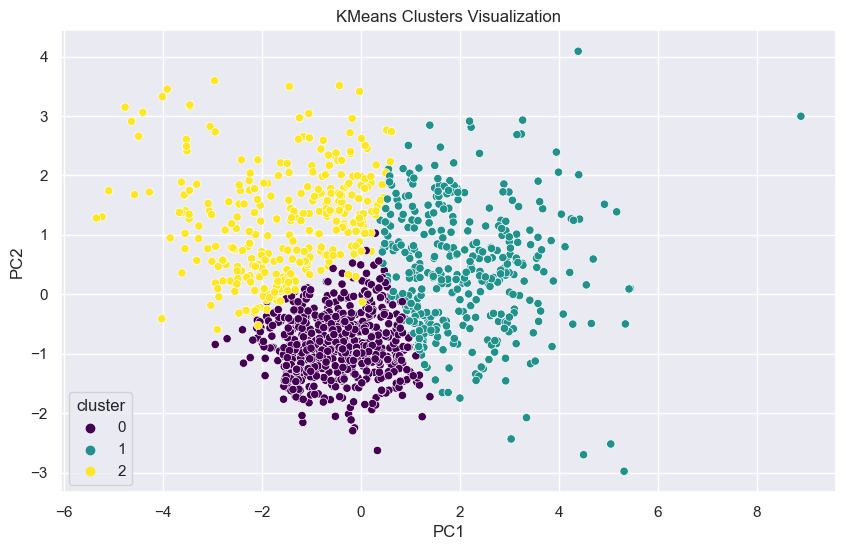

In [227]:
kmeans_without_pca = KMeans(n_clusters=n_clusters, random_state=5)
kmeans_without_pca.fit(data_pca)

# Get the cluster labels
labels = kmeans_without_pca.labels_

# Add the cluster labels as a column in the original DataFrame
data_pca['cluster'] = labels

plt.figure(figsize=(10, 6))

sns.scatterplot(data=data_pca, x=data_pca.columns[0], y=data_pca.columns[1], hue='cluster', palette='viridis')

# Title and labels
plt.title('KMeans Clusters Visualization')
plt.xlabel(data_pca.columns[0])
plt.ylabel(data_pca.columns[1])

# Show the plot
plt.show()


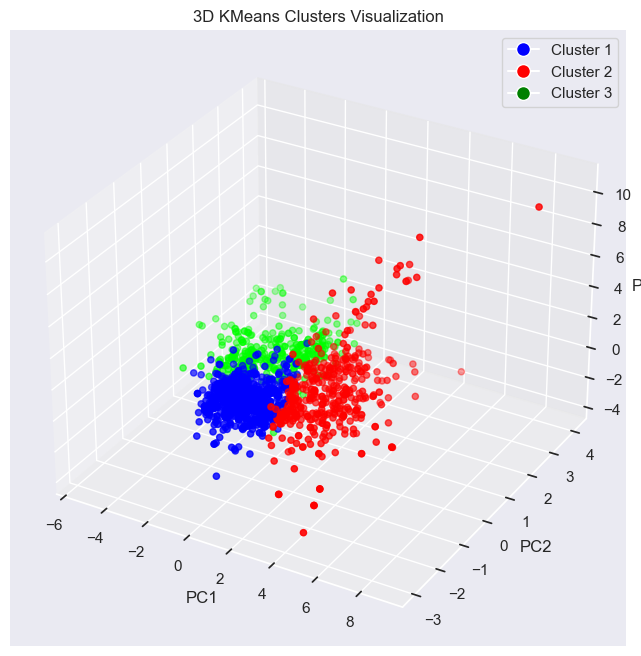

In [228]:
from matplotlib.lines import Line2D

# 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_pca['PC1'], data_pca['PC2'], data_pca['PC3'], c=labels, cmap="brg")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('3D KMeans Clusters Visualization')

colors = ['blue', 'red', 'green']

# Create a list of Line2D objects for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}',
                          markerfacecolor=c, markersize=10) for i, c in enumerate(colors)]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right')


plt.show()